# Fairness statistics


## Task 1

$Y$ - true class (will use XAI)
$\hat{Y}$ - decision (enrolled in training)
$A$ - protected attribute (populations Blue or Red)
$P(\hat{Y}|A=Blue)=0.65$
$P(\hat{Y}|A=Red)=0.5$
Demographic parity = $\frac{P(\hat{Y}|A=Blue)}{P(\hat{Y}|A=Red)}=\frac{0.65}{0.5}=130\%$
$P(\hat{Y}|A=Blue, Y=1)=0.75$
$P(\hat{Y}|A=Red, Y=1)=0.5$
Equal opportunity = $\frac{P(\hat{Y}|A=Blue, Y=1)}{P(\hat{Y}|A=Red, Y=1)}=\frac{0.75}{0.5}=150\%$
$P(Y|A=Blue, \hat{Y}=1)=\frac{60}{65}$
$P(Y|A=Red, \hat{Y}=1)=0.5$
Predictive rate parity = $\frac{P(Y|A=Blue, \hat{Y}=1)}{P(Y|A=Red, \hat{Y}=1)}=\frac{120}{65}\approx 185\%$

## Task 2

### 1. Train a model for the selected dataset.

In [186]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('input/cs-training.csv')
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

I have decided to remove the information about the credit history of customers, as we do not have such a history for new customers.

In [187]:
df.drop(df.columns[[4,8, 10]], axis=1, inplace=True)

For 2 percent of the data, the RevolvingUtilizationOfUnsecuredLines values are greater than 1, they look incorrect, so I filled them according to the distribution of the data

In [188]:
print(len(df[(df['RevolvingUtilizationOfUnsecuredLines']>1)]))

df.loc[df['RevolvingUtilizationOfUnsecuredLines'] > 1, 'RevolvingUtilizationOfUnsecuredLines'] = np.NaN
df['RevolvingUtilizationOfUnsecuredLines'].fillna(method='ffill', inplace=True)
df['RevolvingUtilizationOfUnsecuredLines'].describe()

3321


count    150000.000000
mean          0.303669
std           0.337852
min           0.000000
25%           0.028578
50%           0.144257
75%           0.520104
max           1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

I cut the tails off in the age distribution because they were negligible cases.

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64


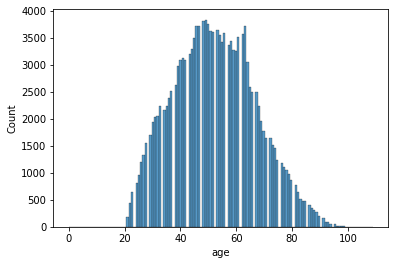

In [189]:
print(df['age'].describe())
sns.histplot(df['age'])
df.loc[df['age']>80, 'age']=80
df.loc[df['age']<18, 'age']=18

In [190]:
print(len(df[(df['DebtRatio']>1)]))
df.loc[df['DebtRatio'] > 1, 'DebtRatio'] = np.NaN
df['DebtRatio'].fillna(method='ffill', inplace=True)
df['DebtRatio'].describe()

35137


count    150000.000000
mean          0.303109
std           0.226290
min           0.000000
25%           0.126122
50%           0.274252
75%           0.438325
max           1.000000
Name: DebtRatio, dtype: float64

I cut the tails off higher than 30 in the NumberOfOpenCreditLinesAndLoans distribution because they were negligible cases.

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64
354


<AxesSubplot:xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='Count'>

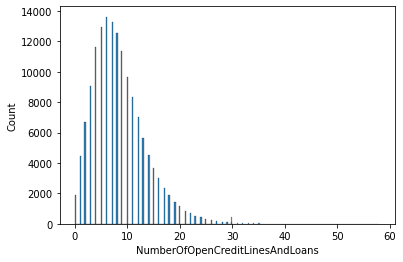

In [191]:
print(df['NumberOfOpenCreditLinesAndLoans'].describe())
sns.histplot(df['NumberOfOpenCreditLinesAndLoans'])
print(len(df[(df['NumberOfOpenCreditLinesAndLoans']>30)]))
df.loc[df['NumberOfOpenCreditLinesAndLoans']>30, 'NumberOfOpenCreditLinesAndLoans']=30
sns.histplot(df['NumberOfOpenCreditLinesAndLoans'])

I cut the tails off MonthlyIncome distribution because they were negligible cases and fill Nan values according to the distribution of the data.

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64
1168
4428


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

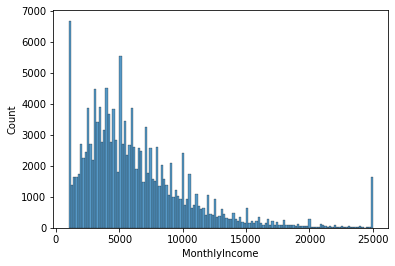

In [192]:
print(df['MonthlyIncome'].describe())
print(len(df[(df['MonthlyIncome']>25000)]))
print(len(df[(df['MonthlyIncome']<1000)]))
df.loc[df['MonthlyIncome']<1000, 'MonthlyIncome'] = 1000
df.loc[df['MonthlyIncome']>25000, 'MonthlyIncome'] = 25000
df['MonthlyIncome'].fillna(method='ffill', inplace=True)
sns.histplot(df['MonthlyIncome'])

I cut the tails off NumberRealEstateLoansOrLines because they were negligible cases.

793


<AxesSubplot:xlabel='NumberRealEstateLoansOrLines', ylabel='Count'>

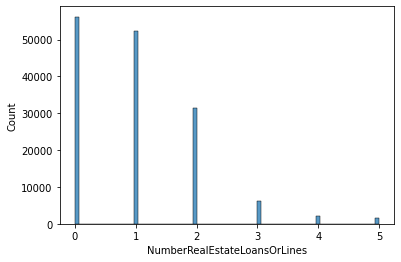

In [193]:
df['NumberRealEstateLoansOrLines'].describe()
print(len(df[(df['NumberRealEstateLoansOrLines']>5)]))
df.loc[df['NumberRealEstateLoansOrLines']>5, 'NumberRealEstateLoansOrLines'] = 5
sns.histplot(df['NumberRealEstateLoansOrLines'])

I cut the tails off NumberOfDependents because they were negligible cases.

245


<AxesSubplot:xlabel='NumberOfDependents', ylabel='Count'>

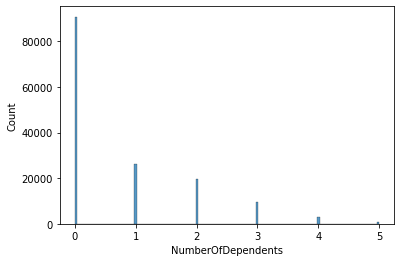

In [194]:
df['NumberOfDependents'].describe()
df['NumberOfDependents'].fillna(value = 0, inplace=True)
print(len(df[(df['NumberOfDependents']>5)]))
df.loc[df['NumberOfDependents']>5, 'NumberOfDependents'] = 5
sns.histplot(df['NumberOfDependents'])

The data is very unbalanced. This will have to be taken into account when training the model. To deal with this problem I will use oversampling technic.

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='Count'>

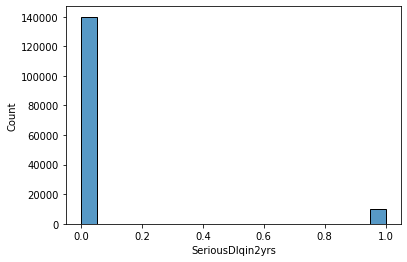

In [195]:
sns.histplot(df['SeriousDlqin2yrs'])

In [196]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df.drop("SeriousDlqin2yrs", axis=1)
y = df["SeriousDlqin2yrs"]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=5)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=4, random_state=0)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)
print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84     34958
           1       0.14      0.56      0.22      2542

    accuracy                           0.73     37500
   macro avg       0.55      0.65      0.53     37500
weighted avg       0.90      0.73      0.80     37500

              precision    recall  f1-score   support

           0       0.80      0.74      0.77    105016
           1       0.76      0.81      0.78    105016

    accuracy                           0.78    210032
   macro avg       0.78      0.78      0.78    210032
weighted avg       0.78      0.78      0.78    210032



### 2. For the selected protected attribute (age, gender, race) calculate the following fairness coefficients: Statistical parity, Equal opportunity, Predictive parity.

In [219]:
import dalex as dx

explainer_rfc = dx.Explainer(rfc, X_test, y_test, verbose=False)
protected_variable = X_test.NumberOfDependents
privileged_group = 0.0

fobject = explainer_rfc.model_fairness(
    protected=protected_variable,
    privileged=privileged_group,
)
fobject.fairness_check(verbose=False)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Bias detected in 5 metrics: TPR, ACC, PPV, FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on '0.0'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
          TPR       ACC       PPV       FPR       STP
1.0  1.871795  0.729017  0.793548  2.913043  2.777778
2.0  2.071795  0.659472  0.819355  3.420290  3.254902
3.0  1.920513  0.645084  0.870968  3.507246  3.320261
4.0  2.112821  0.635492  1.019355  3.652174  3.509804
5.0  2.135897  0.630695  0.851613  3.644928  3.464052


### 3. Train another model (different hyperparameters, feature transformations etc.) and see how the coefficients Statistical parity, Equal opportunity, Predictive parity behave for it.

In [198]:
deeper_rfc = RandomForestClassifier(max_depth=10, random_state=0)
deeper_rfc.fit(X_train, y_train)

y_pred = deeper_rfc.predict(X_test)
y_pred_train = deeper_rfc.predict(X_train)
print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_pred_train))

explainer_deeper_rfc = dx.Explainer(deeper_rfc, X_test, y_test, verbose=False)

fobject = explainer_deeper_rfc.model_fairness(
    protected=protected_variable,
    privileged=privileged_group,
)
fobject.fairness_check()

              precision    recall  f1-score   support

           0       0.96      0.81      0.88     34958
           1       0.15      0.49      0.23      2542

    accuracy                           0.79     37500
   macro avg       0.56      0.65      0.56     37500
weighted avg       0.90      0.79      0.83     37500

              precision    recall  f1-score   support

           0       0.84      0.81      0.82    105016
           1       0.82      0.84      0.83    105016

    accuracy                           0.83    210032
   macro avg       0.83      0.83      0.83    210032
weighted avg       0.83      0.83      0.83    210032



/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Bias detected in 4 metrics: TPR, ACC, FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on '0.0'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
          TPR       ACC      PPV       FPR       STP
1.0  1.130653  0.944976  0.98750  1.362963  1.344371
2.0  1.670854  0.778708  0.86875  2.592593  2.483444
3.0  1.668342  0.747608  0.93750  2.807407  2.682119
4.0  2.070352  0.758373  1.22500  2.874074  2.867550
5.0  1.814070  0.734450  0.89375  2.933333  2.801325


### 4. Apply the selected bias mitigation technique on the first model. Check how Statistical parity, Equal opportunity, Predictive parity coefficients behave after this correction.

In [217]:
from dalex.fairness import reweight
from copy import copy

protected_variable_train = X_train.NumberOfDependents
sample_weight = reweight(
    protected_variable_train,
    y_train,
    verbose=True
)

rfc_reweight = copy(rfc)
rfc_reweight.fit(X_train, y_train, sample_weight=sample_weight)

y_pred = rfc_reweight.predict(X_test)
y_pred_train = rfc_reweight.predict(X_train)
print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_pred_train))
explainer_reweight = dx.Explainer(
    rfc_reweight,
    X_test,
    y_test,
    label='RandomForestClassifier with reweight',
    verbose=False
)
fobject_reweight = explainer_reweight.model_fairness(
    protected_variable,
    privileged_group
)
fobject.fairness_check()

Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
protected Series will be converted to np.ndarray
protected array is not string type, converting to string 


/usr/local/lib/python3.9/site-packages/dalex/fairness/_group_fairness/mitigation.py:58: RuntimeWarning: divide by zero encountered in long_scalars
  Wsc = (Xs * Xc) / (len(y) * Xsc)


              precision    recall  f1-score   support

           0       0.97      0.60      0.74     34958
           1       0.12      0.77      0.21      2542

    accuracy                           0.61     37500
   macro avg       0.55      0.68      0.48     37500
weighted avg       0.91      0.61      0.71     37500

              precision    recall  f1-score   support

           0       0.87      0.60      0.71    105016
           1       0.70      0.91      0.79    105016

    accuracy                           0.75    210032
   macro avg       0.78      0.75      0.75    210032
weighted avg       0.78      0.75      0.75    210032



/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Bias detected in 4 metrics: TPR, ACC, FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on '0.0'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
          TPR       ACC      PPV       FPR       STP
1.0  1.130653  0.944976  0.98750  1.362963  1.344371
2.0  1.670854  0.778708  0.86875  2.592593  2.483444
3.0  1.668342  0.747608  0.93750  2.807407  2.682119
4.0  2.070352  0.758373  1.22500  2.874074  2.867550
5.0  1.814070  0.734450  0.89375  2.933333  2.801325


### 5. Compare the quality (performance) of the three models with their fairness coefficients. Is there any correlation?

In [218]:
pd.concat([
        explainer_rfc.model_performance().result,
        explainer_deeper_rfc.model_performance().result,
        explainer_reweight.model_performance().result,
    ], axis=0)

,recall,precision,f1,accuracy,auc
RandomForestClassifier,0.562156,0.137430,0.220866,0.731147,0.722880
RandomForestClassifier,0.485051,0.154802,0.234701,0.785573,0.728079
RandomForestClassifier with reweight,0.765932,0.122384,0.211045,0.611813,0.729651
